# Approximating Pulses

## Basic Setup

In [1]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt

## Loading data files

Coefficients and Pulses from the first frame of Akiyo

In [2]:
coeffs = np.genfromtxt('data/AkiyoF1_coeffs4x4.csv', delimiter=',')
coeffs = coeffs[:,0:15]
pulses = np.genfromtxt('data/AkiyoF1_pulses4x4.csv', delimiter=',')
pulses = pulses[:,0:15]
ks = np.genfromtxt('data/AkiyoF1_k4x4.csv', delimiter=',')

Sanity check that the pulses match with k

In [3]:
numLines = len(ks)

for i in range(0, numLines):
    assert(ks[i] == sum(abs(pulses[i,:])))

## Gain and Shape

In [4]:
def gain(v):
    return np.sqrt(np.dot(v,v))

def shape(v):
    return np.true_divide(v, gain(v))

## Approximating Pulses
Let's not round for now so we can conserve precision

In [5]:
def approximatePulses(_coeffs, _ks):
    _approxPulses = np.zeros(shape=pulses.shape)
    for i in range(0,len(pulses)):
        s = shape(_coeffs[i,:])
        _approxPulses[i] = np.true_divide(s,sum(np.abs(s)))*_ks[i]
    
    # Sanity check that the approximated pulses match with k     
    for i in range(0, numLines):
        assert(_ks[i] - sum(abs(_approxPulses[i,:])) < 0.0001)    
        
    return _approxPulses

approxPulses = approximatePulses(coeffs, ks)

2.27373675443e-13


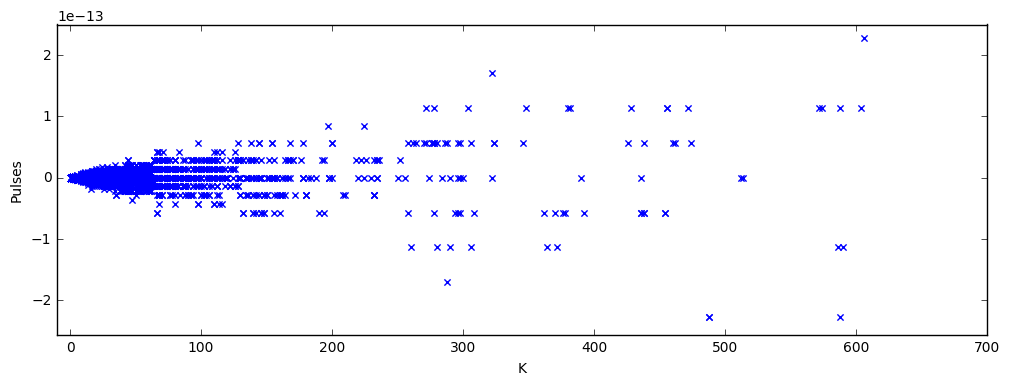

In [7]:
def plotApproxErr(_approxPulses, _pulses):
    plt.figure(figsize=(12,4))
    error = np.abs(_approxPulses[:]).sum(axis=1) - np.abs(_pulses[:]).sum(axis=1)
    print(max(error))
    
    f = plt.scatter(ks, error, marker="x")
    f = plt.xlabel('K')
    f = plt.ylabel('Pulses')
    axes = plt.gca()
    axes.set_xlim([-10,700])
    axes.set_ylim([min(error)*0.9,max(error)*1.1])
    
plotApproxErr(approxPulses, pulses)

## Error on KLeft

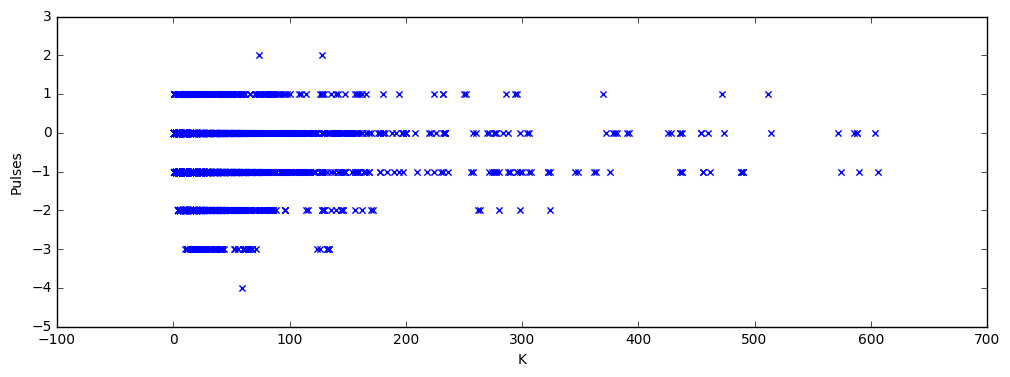

In [8]:
def plotKLeftErr(_approxPulses, _pulses):
    plt.figure(figsize=(12,4))
    KLeftErr = np.round(np.abs(_approxPulses[:,0:7]).sum(axis=1)) - np.abs(_pulses[:,0:7]).sum(axis=1)
    
    f = plt.scatter(ks, KLeftErr, marker="x")
    f = plt.xlabel('K')
    f = plt.ylabel('Pulses')

plotKLeftErr(approxPulses, pulses)

## Akiyo 10 Frames

In [12]:
coeffsF10 = np.genfromtxt('data/AkiyoF10_coeffs4x4.csv', delimiter=',')
coeffsF10 = coeffsF10[:,0:15]
pulsesF10 = np.genfromtxt('data/AkiyoF10_pulses4x4.csv', delimiter=',')
pulsesF10 = pulsesF10[:,0:15]
ksF10 = np.genfromtxt('data/AkiyoF10_k4x4.csv', delimiter=',')

numLines = len(ksF10)

for i in range(0, numLines):
    assert(ks[i] == sum(abs(pulsesF10[i,:])))
    
approxPulsesF10 = approximatePulses(coeffsF10, ksF10)

2.27373675443e-13


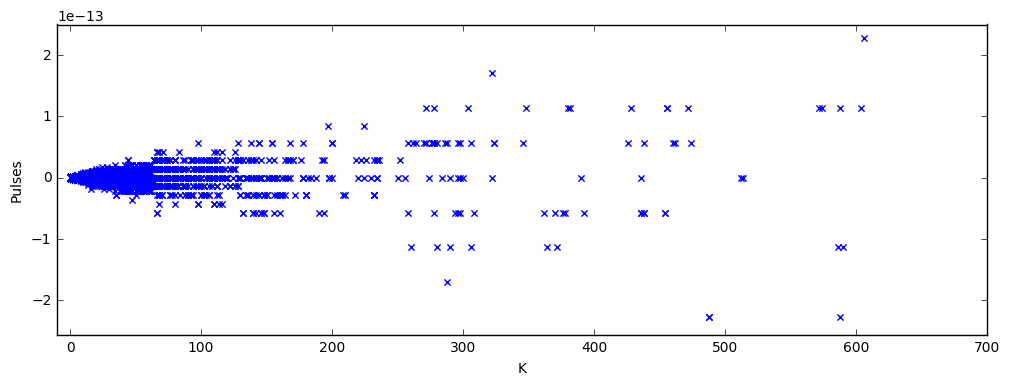

In [13]:
plotApproxErr(approxPulsesF10, pulsesF10)

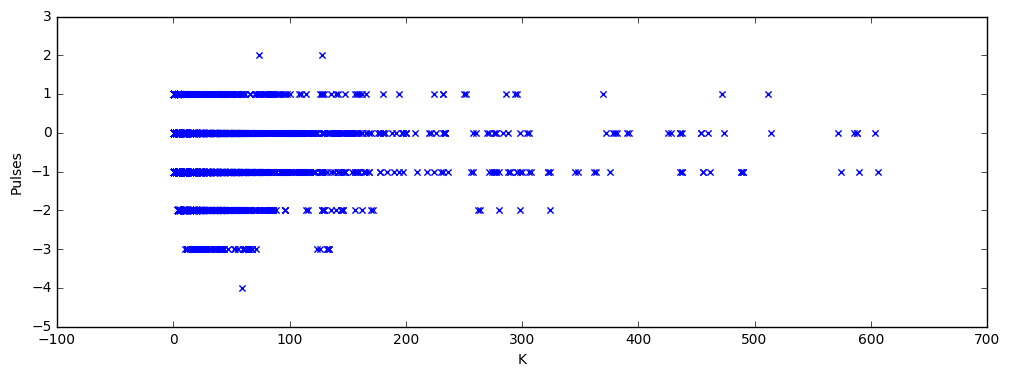

In [14]:
plotKLeftErr(approxPulsesF10, pulsesF10)